# Определение расстояния

In [44]:
x1 = [1,3,-5,7]
x2 = [2,-4,0,8]
import pandas as pd
x1 = pd.DataFrame(x1)
x2 = pd.DataFrame(x2)

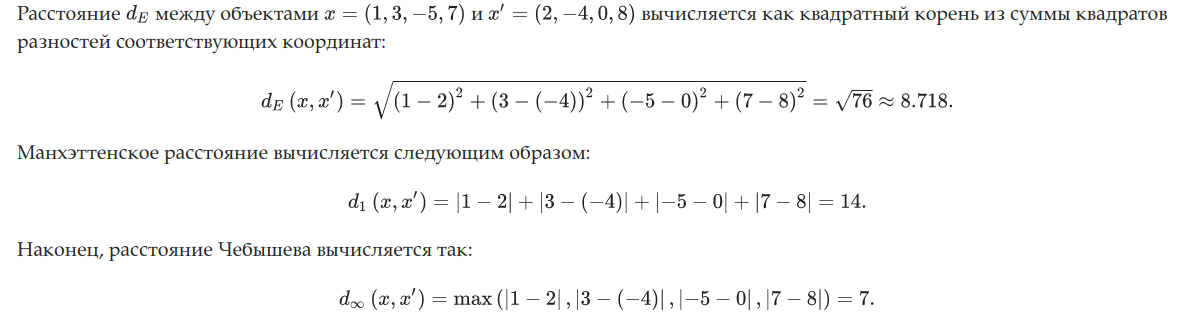

In [15]:
#Евклидово расстояние 
dE = ((x1-x2)**2)
(dE.sum())**0.5

0    8.717798
dtype: float64

In [41]:
#Манхетенское расстояние 
d1 = (x1-x2)**2
(d1**0.5).sum()

0    14.0
dtype: float64

In [43]:
#Расстояние Чебышева
d8=(x1-x2)
d8.max()

NameError: name 'x1' is not defined

# Определение ближайшего элемента

In [54]:
import pandas as pd
import io
data = '''
id,x,y,class
1,28,10,1
2,49,49,1
3,48,35,0
4,36,33,1
5,45,54,0'''
data = pd.read_csv(io.StringIO(data), index_col = 'id')
data

,x,y,class
id,,,
1,28,10,1
2,49,49,1
3,48,35,0
4,36,33,1
5,45,54,0


In [55]:
data_d = data.drop(['class'], axis=1)
data_d

,x,y
id,,
1,28,10
2,49,49
3,48,35
4,36,33
5,45,54


In [56]:
# координаты нового элемента
Xnew = 33
Ynew = 47
# разница между координатами нового элемента и имеющихся
data_difer = data_d.copy(deep=True)
data_difer.x,data_difer.y = data.x-Xnew,data.y-Ynew
# разности 
data_difer

,x,y
id,,
1,-5,-37
2,16,2
3,15,-12
4,3,-14
5,12,7


Евклидово пространство

In [57]:
# Евклидово пространство
# корень из суммы квадратов
# складываем разницы координат
dE = (data_difer.x**2+data_difer.y**2)**0.5
dE

id
1    37.336309
2    16.124515
3    19.209373
4    14.317821
5    13.892444
dtype: float64

In [58]:
# минимальное расстояние до нового элемента
dE.min()

13.892443989449804

Манхетенское (единичное)

In [59]:
# Манхетенское (единичное)
d1 = (data_difer.x**2)**0.5+(data_difer.y**2)**0.5
d1

id
1    42.0
2    18.0
3    27.0
4    17.0
5    19.0
dtype: float64

In [60]:
# минимальное расстояние до нового элемента
d1.min()

17.0

расстояние Чебышева
определяем максимумы каждой разницы
и берем минимальное значение

In [61]:
dmax = data_difer.copy(deep=True)
dmax.x = (data_difer.x**2)**0.5
dmax.y = (data_difer.y**2)**0.5
dmax

,x,y
id,,
1,5.0,37.0
2,16.0,2.0
3,15.0,12.0
4,3.0,14.0
5,12.0,7.0


In [62]:
# определяем каксимальное расстояние до каждого элемента
dmax.max(axis=1)

id
1    37.0
2    16.0
3    15.0
4    14.0
5    12.0
dtype: float64

In [63]:
# из полученного списка выбираем ближайший элемент (минмальное занчеие)
(dmax.max(axis=1)).min()

12.0

# Метод k ближайших соседей

Веса обратно пропорциональны квадрату расстояния между объектами.
В данном примере Евклидово пространство

In [87]:
# Евклидово пространство
# корень из суммы квадратов
# складываем разницы координат
# берем определенное ранее
dE

id
1    37.336309
2    16.124515
3    19.209373
4    14.317821
5    13.892444
dtype: float64

In [71]:
omega = dE.copy(deep=True)

In [72]:
# Веса обратно пропорциональны квадрату расстояния между объектами
omega = 1/ (dE)**2
omega

id
1    0.000717
2    0.003846
3    0.002710
4    0.004878
5    0.005181
dtype: float64

In [68]:
# начальная таблица элементов
data

,x,y,class
id,,,
1,28,10,1
2,49,49,1
3,48,35,0
4,36,33,1
5,45,54,0


In [75]:
# добавляем столбик с весами
data_add_omega = data.copy(deep=True)
data_add_omega['omega']=omega
data_add_omega

,x,y,class,omega
id,,,,
1,28,10,1,0.000717
2,49,49,1,0.003846
3,48,35,0,0.002710
4,36,33,1,0.004878
5,45,54,0,0.005181


In [83]:
# взвешенная сумма весов элементов 1ого класса

#фильтруем 1 класс
data_1 = data_add_omega[data_add_omega['class']==1]
# суммируем веса
data_1.omega.sum()

0.00944156274141927

In [86]:
round(data_1.omega.sum(),4)

0.0094

In [82]:
# взвешенная сумма весов элементов 0ого класса

#фильтруем 0 класс
data_0 = data_add_omega[data_add_omega['class']==0]
# суммируем веса
data_0.omega.sum()

0.007891374250530072

In [85]:
round(data_0.omega.sum(),3)

0.008

In [ ]:
if (data_1.omega.sum())>(data_0.omega.sum()):
    print('веса 1ого класса больше')
elif (data_1.omega.sum())<(data_0.omega.sum()):
    print('веса 1ого класса больше')
e
